<a href="https://colab.research.google.com/github/Narendra-Singh-shekhawat/Fake-news-classifier-NLP/blob/master/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
df=pd.read_csv("/content/drive/My Drive/dataset/train.csv/train.csv")

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df["label"].nunique()

2

In [ ]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
df1=df.copy()

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
len(df1["text"])

18285

In [ ]:
df1["text"][0:10]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \nAn Iranian woman has been sentenced to...
5    In these trying times, Jackie Mason is the Voi...
6    PARIS  —   France chose an idealistic, traditi...
7    A week before Michael T. Flynn resigned as nat...
8    Organizing for Action, the activist group that...
9    The BBC produced spoof on the “Real Housewives...
Name: text, dtype: object

In [ ]:
corpus=[]
for i in range(0,len(df1)):
  news=re.sub("[^a-zA-Z]"," ",df1["title"][i])
  news=news.lower()
  news=news.split()
  news=[wordnet.lemmatize(word) for word in news if not word in set(stopwords.words("english"))]
  news=" ".join(news)
  corpus.append(news)

In [ ]:
corpus[0:5]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:


cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()


In [ ]:
y=df1["label"]

In [ ]:
cv.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
df_new=pd.DataFrame(X,columns=cv.get_feature_names())

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
MN=MultinomialNB()
par_MN={"alpha":np.arange(0,1,0.1)}
GS_MN=GridSearchCV(MN,par_RF,cv=5,scoring="roc_auc")
GS_MN.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
GS_MN.best_params_

{'alpha': 0.2}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [ ]:
MN=MultinomialNB(alpha=0.2)
PA=PassiveAggressiveClassifier()
MN_bag=BaggingClassifier(base_estimator=MN,n_estimators=10,random_state=0)
MN_boost=AdaBoostClassifier(base_estimator=MN,n_estimators=15,random_state=0)

In [ ]:
models=[]
models.append(("multinomialNB",MN))
models.append(("PassiveAgressiveClassifier",PA))
models.append(("baggedMB",MN_bag))
models.append(("boostMB",MN_boost))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,y,cv = kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('NAME: {} ----- MEAN: {} ----- VAR: {} '.format(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

NAME: multinomialNB ----- MEAN: 0.9651920754807991 ----- VAR: 7.548981941315622e-06 
NAME: PassiveAgressiveClassifier ----- MEAN: 0.9695999098823571 ----- VAR: 2.1301237332432397e-06 
NAME: baggedMB ----- MEAN: 0.9656491979623155 ----- VAR: 1.0615128431248027e-05 
NAME: boostMB ----- MEAN: 0.9725886821233131 ----- VAR: 4.843405625548455e-06 


multinomialNB
Here is our mean accuracy on the test set:
 0.898
Here is our mean accuracy on the train set:
 0.929


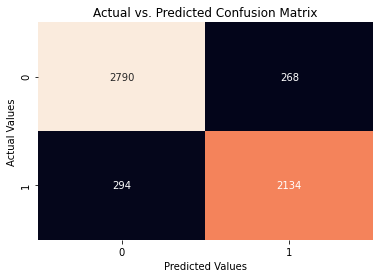


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.91      0.90      0.91      3084
           1       0.88      0.89      0.88      2402

    accuracy                           0.90      5486
   macro avg       0.90      0.90      0.90      5486
weighted avg       0.90      0.90      0.90      5486

--------------------------------------------------------

PassiveAgressiveClassifier
Here is our mean accuracy on the test set:
 0.913
Here is our mean accuracy on the train set:
 1.000


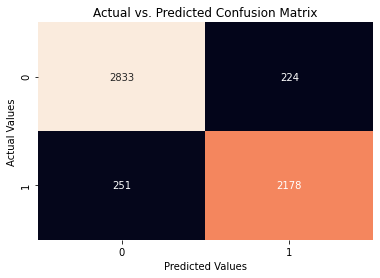


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.93      0.92      0.92      3084
           1       0.90      0.91      0.90      2402

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486

--------------------------------------------------------

baggedMB
Here is our mean accuracy on the test set:
 0.898
Here is our mean accuracy on the train set:
 0.928


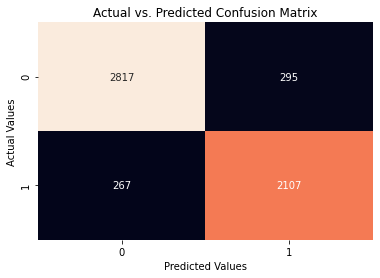


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3084
           1       0.89      0.88      0.88      2402

    accuracy                           0.90      5486
   macro avg       0.90      0.90      0.90      5486
weighted avg       0.90      0.90      0.90      5486

--------------------------------------------------------

boostMB
Here is our mean accuracy on the test set:
 0.908
Here is our mean accuracy on the train set:
 0.911


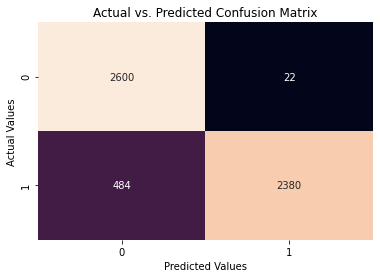


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.99      0.84      0.91      3084
           1       0.83      0.99      0.90      2402

    accuracy                           0.91      5486
   macro avg       0.91      0.92      0.91      5486
weighted avg       0.92      0.91      0.91      5486

--------------------------------------------------------



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
for name,model in models:
  print(name)
  model.fit(x_train,y_train)
  y_predict_LR=model.predict(x_test)
  accuracy_test =model.score(x_test,y_test)

  print("Here is our mean accuracy on the test set:\n {0:.3f}"\
        .format(accuracy_test))
  accuracy_train =model.score(x_train,y_train)

  print("Here is our mean accuracy on the train set:\n {0:.3f}"\
        .format(accuracy_train))
  confusion = metrics.confusion_matrix( y_predict_LR, y_test )
  sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Actual vs. Predicted Confusion Matrix')
  plt.show()
  print()
  print('CLASSIFICATION REPORT',classification_report(y_test, y_predict_LR))
  print('--------------------------------------------------------')
  print()

In [ ]:
voc_size=5000

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [43]:
one_hot_rep=[one_hot(i,voc_size) for i in corpus]


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
import numpy as np

In [ ]:
embedded_corpus=pad_sequences(one_hot_rep,padding='pre',maxlen=20)
print(embedded_corpus)

[[  0   0   0 ... 849 243 321]
 [  0   0   0 ... 496 881 729]
 [  0   0   0 ...  97 846 981]
 ...
 [  0   0   0 ... 222 200 643]
 [  0   0   0 ... 250 483 621]
 [  0   0   0 ... 185 888 321]]


In [ ]:
model=Sequential()
model.add(Embedding(voc_size,40,input_length=20))
model.add(LSTM(100))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam" ,loss="binary_crossentropy",metrics=["accuracy"])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np

In [ ]:
X=np.array(embedded_corpus)
y=np.array(df1["label"])

In [ ]:
X.shape,y.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [ ]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
192/192 [==============================] - 6s 34ms/step - loss: 0.3541 - accuracy: 0.8331 - val_loss: 0.2428 - val_accuracy: 0.8946
Epoch 2/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1951 - accuracy: 0.9202 - val_loss: 0.2259 - val_accuracy: 0.9001
Epoch 3/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1751 - accuracy: 0.9277 - val_loss: 0.2202 - val_accuracy: 0.9085
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1586 - accuracy: 0.9369 - val_loss: 0.2378 - val_accuracy: 0.9070
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1455 - accuracy: 0.9427 - val_loss: 0.2291 - val_accuracy: 0.9046
Epoch 6/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1279 - accuracy: 0.9513 - val_loss: 0.2547 - val_accuracy: 0.9054
Epoch 7/10
192/192 [==============================] - 6s 31ms/step - loss: 0.1153 - accuracy: 0.9546 - val_loss: 0.2516 - val_accuracy: 0.9014

# New Section